# Reader Study Demo
Brief: This notebook demonstrates how to use `meddlr_viz.gui.ReaderStudyTemplate` to design your own reader studies for medical images.

Building the infrastructure for reader studies can be difficult for many reasons, including:
- Data has to be carefully formatted (e.g. DICOM) to be compatible with existing viewers
- Data needs to be shipped across multiple readers

With [MeddlrViz](https://github.com/ad12/meddlr-viz) & [Meerkat](https://github.com/HazyResearch/meerkat), we can extend pre-built reader study interfaces that are
- Compatible with any data type
- Easy to spawn and share

In this demo, we will explore how to use the `meddlr_viz.gui.ReaderStudyTemplate` to design your own reader studies for medical images.

In [1]:
import meerkat as mk
import meddlr as mr

## Formatting the DataFrame
Meerkat dataframes support lazy loading of our medical images. Meerkat use [PyVoxel](https://github.com/pyvoxel/pyvoxel) to load medical images in different data formats. 

Load in any 3D DICOM series / NIFTI file

In [21]:
# Path to your scans (e.g. DICOM series directory or Nifti files) that you want to compare.
img1_paths = [
    "/Users/arjundd/research/data/healthy_dess_arjun/qdess/echo1.nii.gz"
]

img2_paths = [
    "/Users/arjundd/research/data/healthy_dess_arjun/qdess/echo2.nii.gz"
]

In [22]:
# Load the data lazily with orientation "SI", "AP", "LR"
orientation = ("SI", "AP", "LR")
img1 = mk.files(img1_paths, type="medimg").defer(lambda x: x.reformat(orientation))
img2 = mk.files(img2_paths, type="medimg").defer(lambda x: x.reformat(orientation))

df = mk.DataFrame({"img1": img1, "img2": img2})

In [23]:
# Add noise to the image.
import numpy as np

# df["img2"] = df["img"].defer(lambda x: x + np.random.randn(*x.shape) * 0.1)

,img1,img2,pkey
0,,,0

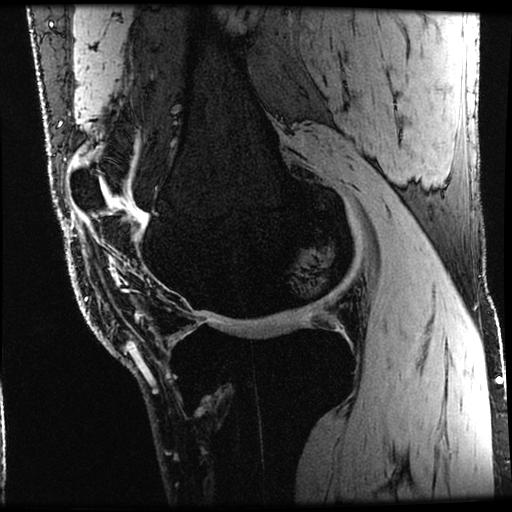
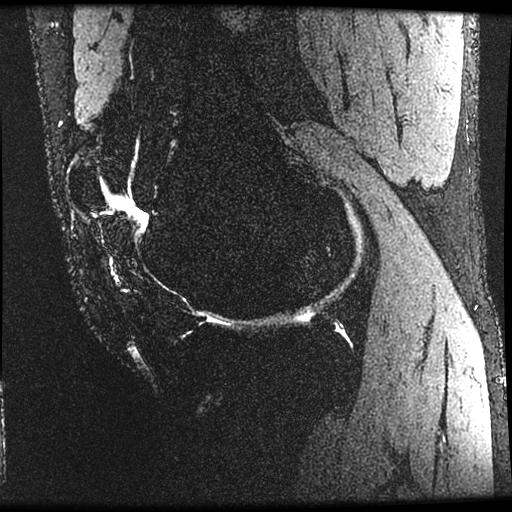

In [24]:
df

## Reader study
Let's build a reader study interface to label these images.

In [25]:
# Start the meerkat server
mk.gui.start(api_port=5005, frontend_port=8005, skip_build=True, dev=False)

(APIInfo(api=<fastapi.applications.FastAPI object at 0x2afbe6bb0>, port=5005, server=<meerkat.interactive.server.Server object at 0x2fa652a30>, name='127.0.0.1', shared=False, process=None, _url=None),
 FrontendInfo(package_manager='npm', port=8005, name='localhost', shared=False, process=<Popen: returncode: None args: ['python', '-m', 'http.server', '8005']>, _url=None))

In [28]:
from meddlr_viz.gui import ReaderStudyTemplate
from typing import Dict

class ReaderStudy(ReaderStudyTemplate):
    def build_scorers(self) -> Dict[str, mk.gui.Component]:
        return {
            "Aliasing": mk.gui.Slider(min=0, max=5, step=1),
            "SNR": mk.gui.Slider(min=0, max=5, step=1),
        }

In [29]:
view = ReaderStudy(df, columns=["img1", "img2"], ncols=2)

# control the display size in the jupyter notebook.
view._get_ipython_height = lambda: 800
view

In [ ]:
# Get the label dataframe.
view.label_df